Setup stuff

In [4]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from mmfsim.grid import Grid
from mmfsim.fiber import GrinFiber, StepIndexFiber


fiber_type: str = 'grin' # 'grin' or 'step'
grid_settings: dict = {'pixel_size': 3.45e-6 / 16, 'pixel_numbers': (256, 256)}
fiber_settings: dict = {'radius': 26e-6, 'wavelength': 1064e-9, 'n1': 1.465, 'n2': 1.45}

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Generate the grid and the fiber

In [5]:
grid = Grid(**grid_settings)

if fiber_type.lower() in ['grin']:
    fiber = GrinFiber(**fiber_settings)
elif fiber_type.lower() in ['step', 'si']:
    fiber = StepIndexFiber(**fiber_settings)
else:
    raise ValueError(f"Unknown fiber type.")
print(fiber)

GrinFiber instance with:
  - Radius: 26.0 um
  - Core index: 1.465
  - Cladding index: 1.45
  - Wavelength: 1064.0 nm
  - Numerical aperture: 0.209
  - Number of guided LP modes: 64
  - Number of guided LP modes (counting degenerates): 113
  - First 10 LP_n,m modes characteristics:
  n_eff      h          n          m
[[1.465      0.         0.         1.        ]
 [1.46407036 1.         0.         2.        ]
 [1.46314072 2.         1.         1.        ]
 [1.46314072 2.         0.         3.        ]
 [1.46221107 3.         1.         2.        ]
 [1.46221107 3.         0.         4.        ]
 [1.46128143 4.         2.         1.        ]
 [1.46128143 4.         1.         3.        ]
 [1.46128143 4.         0.         5.        ]
 [1.46035179 5.         2.         2.        ]]


Compute and store the modes for a much faster dataset generation, plot one for checking extent

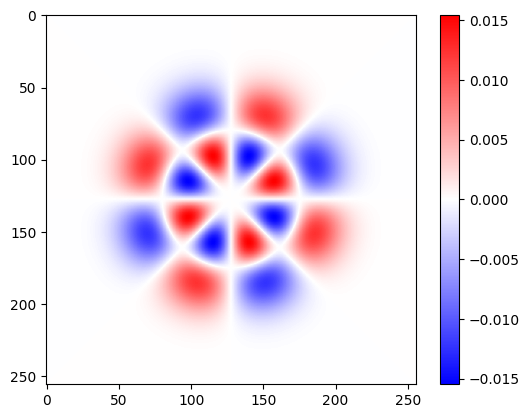

In [6]:
fiber.compute_modes_fields(grid)
plt.imshow(fiber._modes[:,:,1,25], cmap="bwr")
plt.colorbar()

In [7]:
from scipy.io import savemat


fiber_settings.update(dict(NA = fiber._NA))

savemat(
    file_name='',
    mdict=dict(grid = grid_settings, fiber_type = fiber_type, fiber_settings = fiber_settings, modes = fiber._modes)
)

TypeError: savemat() got an unexpected keyword argument 'grid'